In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# DBSCAN(Density-Based Spatial Clustring of Applications with Noise)

In [5]:
from sklearn.datasets import make_blobs

In [6]:
dataset = make_blobs(n_samples=500, n_features=2, centers=4)

In [11]:
def plot_dataset(dataset):
    plt.figure(figsize=(10,7))
    sns.scatterplot(x=dataset[0][:,0], y=dataset[0][:,1],
                   hue=dataset[1])

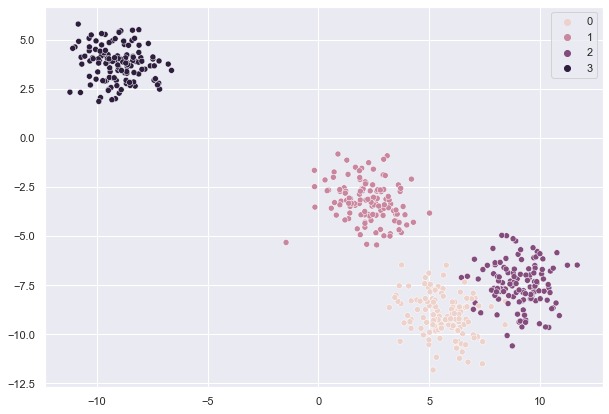

In [12]:
plot_dataset(dataset)

# Dataset

In [13]:
df = pd.read_csv("Datasets/Mall_Customers.csv")

In [14]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
# Only considering the last 2 features...
X = df.iloc[:, [3,4]]

In [17]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [59]:
def plot_dataset(X):
    # if you want to slice a pandas.Dataframe the use .iloc 
    # both are same
    X = np.array(X)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=X[:,0], y=X[:,1])

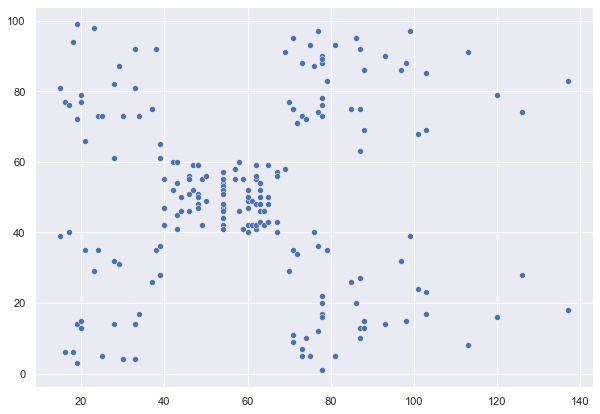

In [60]:
plot_dataset(X)

In [18]:
from sklearn.cluster import DBSCAN

In [21]:
dbscan = DBSCAN(eps=3, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=3, min_samples=4)

In [62]:
# Here -1 indicates the outliers
labels = dbscan.labels_
dbscan.labels_[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [61]:
from sklearn import metrics

In [63]:
# Identifying the points which make up the core points
sample_cores = np.zeros_like(labels, dtype=bool)

In [72]:
# core_sample_indices gives value of indices that are our Core points
sample_cores[dbscan.core_sample_indices_] = True

In [73]:
# Calculating the number of Clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

In [74]:
n_clusters

9

In [79]:
def plot_dbscan(X, labels):
    # if you want to slice a pandas.Dataframe the use .iloc 
    # both are same
    X = np.array(X)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=X[:,0], y=X[:,1],
                   hue=labels)

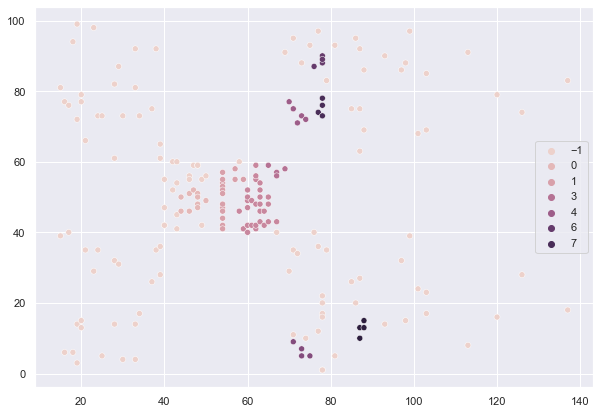

In [80]:
plot_dbscan(X, labels)

In [88]:
def plot_dbscan(X, labels):
    # if you want to slice a pandas.Dataframe the use .iloc 
    # both are same
    X = np.array(X)
    
    # minimum and maximum point values
    xmin = np.min(X[:,0])
    xmax = np.max(X[:,0])
    ymin = np.min(X[:,1])
    ymax = np.max(X[:,1])
    
    # main plotting
    # can't use the contour method here cause it dosen't have a predict method
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels)

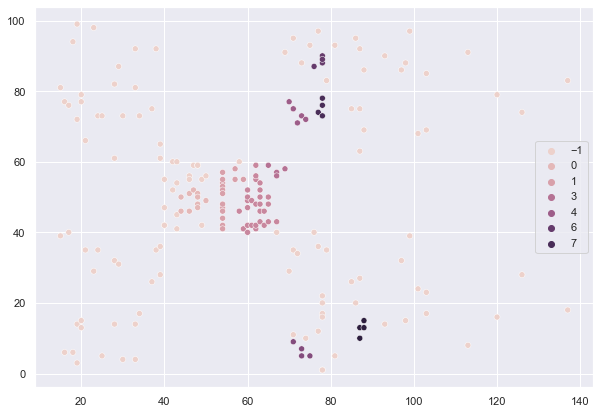

In [89]:
plot_dbscan(X, labels)